In [50]:
from qiskit import *
from TOKEN import ACCESS_TOKEN # get ibmq access token
%matplotlib inline

In [51]:
quantumBits = 3
classicalBits = 1
qc = QuantumCircuit(quantumBits, classicalBits)

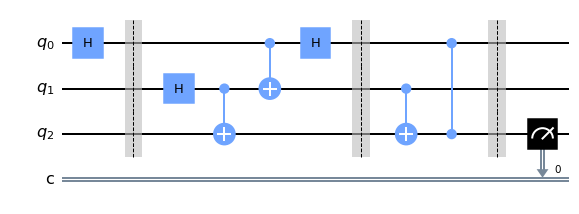

In [52]:
# Target value
qc.h(0)

qc.barrier()

# Teleportation Circuit
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)

qc.barrier()

qc.cx(1, 2)
qc.cz(0, 2)

qc.barrier()

qc.measure([2],[0])
qc.draw(output='mpl')

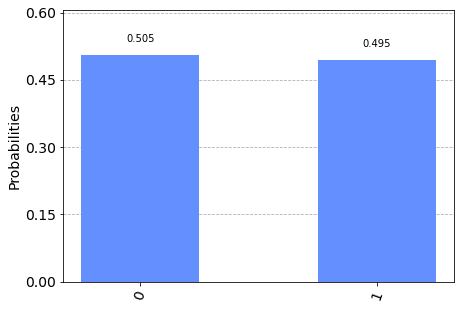

In [53]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=sim, shots=1024).result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

configrc.store_credentials:WARNING:2021-01-03 20:18:22,204: Credentials already present. Set overwrite=True to overwrite.
C:\ProgramData\Anaconda3\envs\Qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Job Status: job has successfully run


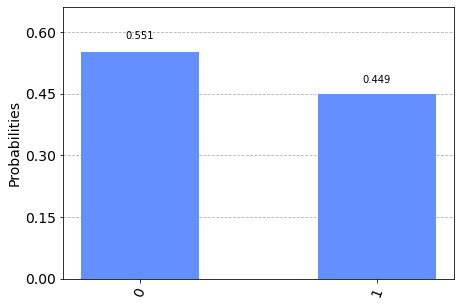

In [54]:
# load account to use quantum computer
IBMQ.save_account(ACCESS_TOKEN)
IBMQ.load_account()

# execute on real quantum computer
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job) # get quantum computer queues
result = job.result() # get result from real quantum computer
plot_histogram(result.get_counts(qc)) # visualize result
